# Explore here

In [10]:
# Your code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

data = data[["Latitude", "Longitude", "MedInc"]]

print(data.head())


   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


In [4]:
X = data.copy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [6]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)
X_train["cluster"] = kmeans.labels_

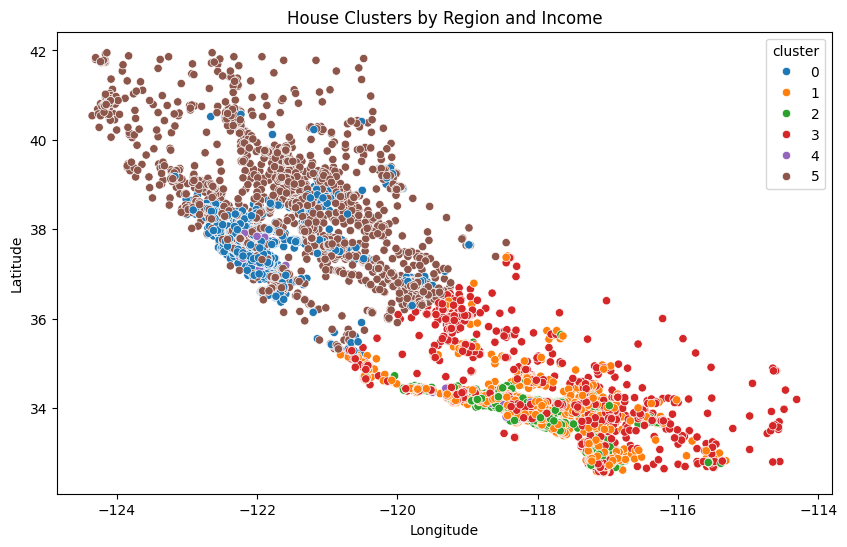

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue="cluster", palette="tab10")
plt.title("House Clusters by Region and Income")
plt.show()

In [9]:
X_test["cluster"] = kmeans.predict(X_test)

In [11]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train.drop(columns=["cluster"]), X_train["cluster"])
y_pred = clf.predict(X_test.drop(columns=["cluster"]))

print(classification_report(X_test["cluster"], y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [12]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(clf, "supervised_model.pkl")

['supervised_model.pkl']